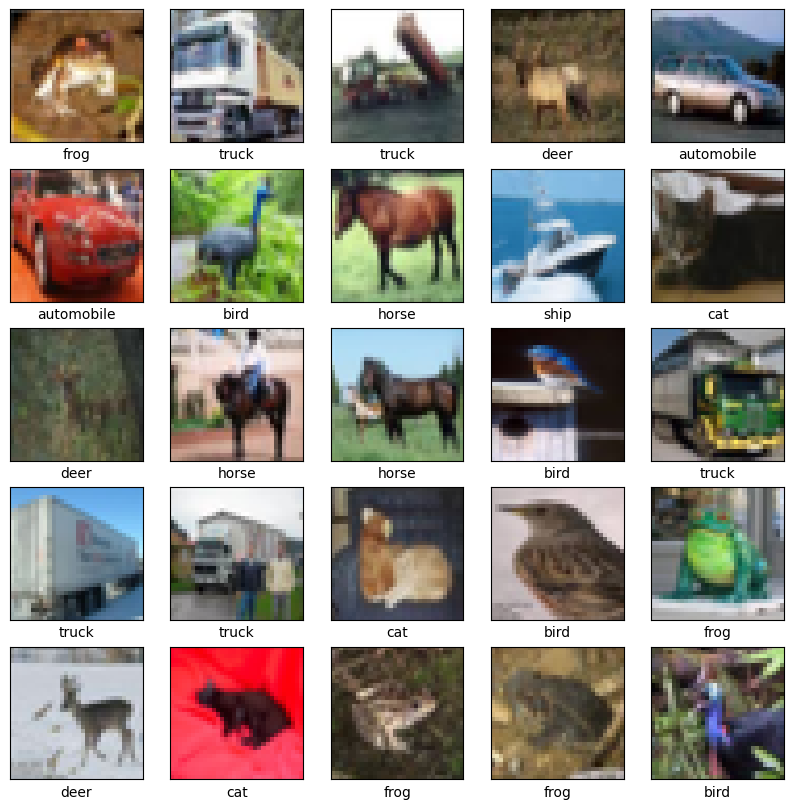

Epoch 1/10
1563/1563 [==============================] - 89s 54ms/step - loss: 1.5171 - accuracy: 0.4473 - val_loss: 1.2400 - val_accuracy: 0.5560
Epoch 2/10
1563/1563 [==============================] - 77s 50ms/step - loss: 1.1572 - accuracy: 0.5903 - val_loss: 1.0802 - val_accuracy: 0.6139
Epoch 3/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.0042 - accuracy: 0.6448 - val_loss: 1.0432 - val_accuracy: 0.6364
Epoch 4/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.9087 - accuracy: 0.6811 - val_loss: 0.9491 - val_accuracy: 0.6648
Epoch 5/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.8402 - accuracy: 0.7048 - val_loss: 0.9282 - val_accuracy: 0.6759
Epoch 6/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7779 - accuracy: 0.7275 - val_loss: 0.9067 - val_accuracy: 0.6890
Epoch 7/10
1563/1563 [==============================] - 82s 52ms/step - loss: 0.7305 - accuracy: 0.7427 - val_loss: 0.8845 -

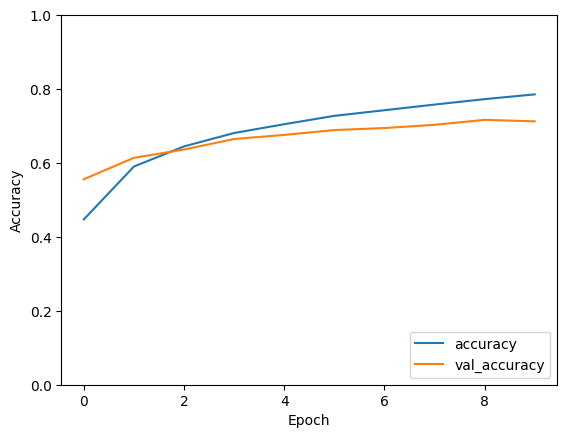

313/313 - 5s - loss: 0.8905 - accuracy: 0.7126 - 5s/epoch - 17ms/step
Test accuracy: 0.7125999927520752
313/313 [==============================] - 4s 12ms/step


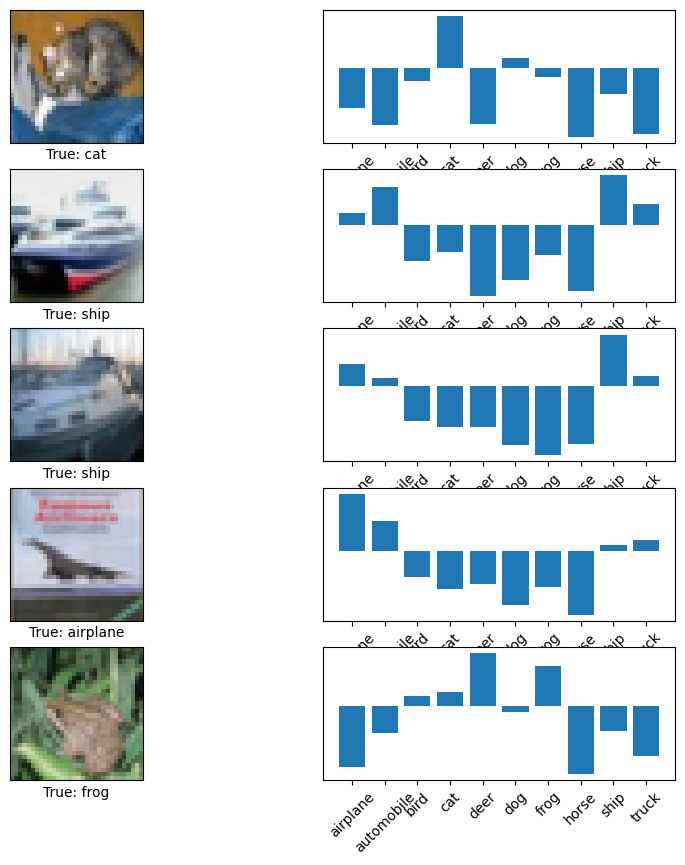

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt



(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize the images to the range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot the first few images with their labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Plot accuracy and loss over time
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

# Make predictions on test images
predictions = model.predict(test_images)

# Show the first 5 test images, their predicted labels, and the true labels
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5, 2, 2 * i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f"True: {class_names[test_labels[i][0]]}")
    plt.subplot(5, 2, 2 * i + 2)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.bar(range(10), predictions[i])
    plt.xticks(range(10), class_names, rotation=45)
plt.show()
